In [3]:
# Importing the required libraries
# Note %matplotlib inline works only for ipython notebook. It will not work for PyCharm. It is used to show the plot distributions
# Make sure to put %matplotlib inline as the first line of code when visualising plots. Also in pyCharm IDE use plt.show() to see the plot
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api
import statsmodels.formula.api as smf
sns.set(color_codes=True)

In [4]:
# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [7]:
# Loading the data
gapURL='https://raw.githubusercontent.com/duttashi/Data-Analysis-Visualization/master/gapminder.csv'
gapmind=pd.read_csv(gapURL)

In [8]:
# Print the column headers/headings
names=gapmind.columns.values
print names

['country' 'incomeperperson' 'alcconsumption' 'armedforcesrate'
 'breastcancerper100th' 'co2emissions' 'femaleemployrate' 'hivrate'
 'internetuserate' 'lifeexpectancy' 'oilperperson' 'polityscore'
 'relectricperperson' 'suicideper100th' 'employrate' 'urbanrate']


In [9]:
# setting variables that you will be working with to numeric
gapmind['breastcancerper100th']= gapmind['breastcancerper100th'].convert_objects(convert_numeric=True)
gapmind['urbanrate']= gapmind['urbanrate'].convert_objects(convert_numeric=True)
gapmind['alcconsumption']= gapmind['alcconsumption'].convert_objects(convert_numeric=True)

In [10]:
print ('Summary statistics for Urbanicity')
m1= gapmind['urbanrate'].describe()
print m1

Summary statistics for Urbanicity
count   203.00
mean     56.77
std      23.84
min      10.40
25%      36.83
50%      57.94
75%      74.21
max     100.00
Name: urbanrate, dtype: float64


In [11]:
#Centering urban rate variable
gapmind['curbanrate'] = np.nansum([gapmind['urbanrate'], -56.77], axis=0)

In [12]:
print ('Summary statistics for Centered Urban Rate')
m2= gapmind['curbanrate'].describe()
print m2

Summary statistics for Centered Urban Rate
count   203.00
mean     -0.00
std      23.84
min     -46.37
25%     -19.94
50%       1.17
75%      17.44
max      43.23
Name: curbanrate, dtype: float64


Axes(0.125,0.125;0.775x0.775)


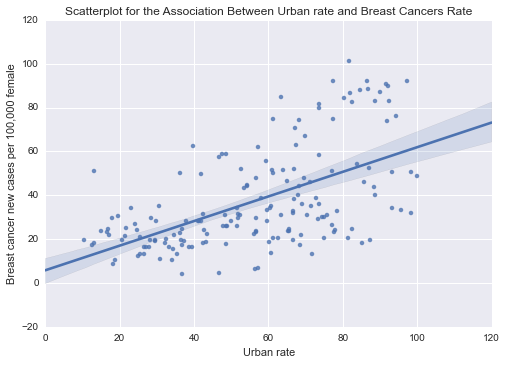

In [14]:
scat1 = sns.regplot(x="urbanrate", y="breastcancerper100th", scatter=True, data=gapmind)
plt.xlabel('Urban rate')
plt.ylabel('Breast cancer new cases per 100,000 female')
plt.title ('Scatterplot for the Association Between Urban rate and Breast Cancers Rate')
print scat1

In [15]:
print ("Regression model for the Association Between Urban rate and Breast Cancers Rate")
reg1 = smf.ols('breastcancerper100th ~ urbanrate', data=gapmind).fit()
print (reg1.summary())

Regression model for the Association Between Urban rate and Breast Cancers Rate
                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.325
Model:                              OLS   Adj. R-squared:                  0.321
Method:                   Least Squares   F-statistic:                     82.00
Date:                  Wed, 16 Mar 2016   Prob (F-statistic):           3.12e-16
Time:                          15:55:31   Log-Likelihood:                -746.80
No. Observations:                   172   AIC:                             1498.
Df Residuals:                       170   BIC:                             1504.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------

Axes(0.125,0.125;0.775x0.775)


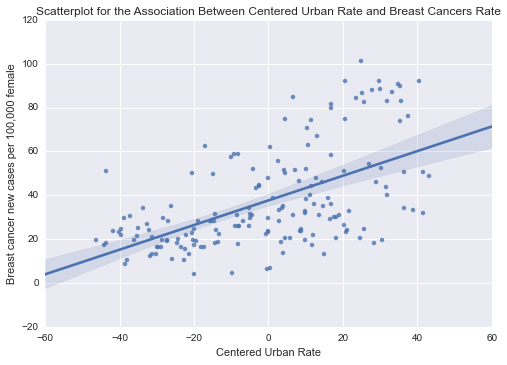

In [16]:
scat2 = sns.regplot(x="curbanrate", y="breastcancerper100th", scatter=True, data=gapmind)
plt.xlabel('Centered Urban Rate')
plt.ylabel('Breast cancer new cases per 100,000 female')
plt.title ('Scatterplot for the Association Between Centered Urban Rate and Breast Cancers Rate')
print(scat2)

In [17]:
print ("Regression model for Centered Urban Rate and Breast Cancers Rate")
reg2 = smf.ols('breastcancerper100th ~ curbanrate', data=gapmind).fit()
print (reg2.summary())
#%%
#End of the code!

Regression model for Centered Urban Rate and Breast Cancers Rate
                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.325
Model:                              OLS   Adj. R-squared:                  0.321
Method:                   Least Squares   F-statistic:                     82.00
Date:                  Wed, 16 Mar 2016   Prob (F-statistic):           3.12e-16
Time:                          15:56:35   Log-Likelihood:                -746.80
No. Observations:                   172   AIC:                             1498.
Df Residuals:                       170   BIC:                             1504.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------